# Predicting Song Popularity Using Regression Models

## **Introduction**
Music has always been an integral part of our lives, and the advent of streaming platforms like Spotify has transformed how we listen to and discover songs. With millions of tracks available, understanding what makes a song popular has become an intriguing challenge. In this project, we aim to predict the **popularity of songs** based on their **audio features** using regression models.

---

## **Objective**
The goal of this project is to build a regression model that predicts a song's **popularity score** (e.g., Spotify Popularity Score) using its **audio features**, such as:
- year
- genre
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration
- time_signature

By analyzing these features, we aim to uncover insights into the characteristics that make a song resonate with listeners.

---

## **1. Data Collection**

**Using a Public Dataset for Song Popularity Prediction**

### **Dataset Overview**
- **Source:** [Kaggle](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks)  
  The dataset used for this project was sourced from Kaggle, specifically the "Spotify_1Million_Tracks".
  
- **Content:**  
  This dataset contains detailed information about songs released between 2000 and 2023, including:
  - **Audio Features:** Danceability, energy, valence, tempo, etc.
  - **Metadata:** Song title, artist, release date, and duration.
  - **Target Variable:** Popularity score (ranging from 0 to 100), reflecting a song's performance on Spotify.

- **Size:** Approximately 1.159.764 rows and 20 columns.

### **Advantages of Using This Dataset**
1. **Rich Features:** The dataset provides diverse audio features, enabling in-depth analysis of factors influencing song popularity.
2. **Pre-cleaned:** Public datasets often undergo basic preprocessing, saving time on data cleaning.
3. **Reproducibility:** Using a publicly available dataset ensures that the project can be replicated and extended by others.

### **Limitations of Public Data**
1. **Bias in Popularity Scores:** The popularity metric is specific to Spotify and may not represent other platforms or global trends.
2. **Time-Specific Trends:** The dataset spans several decades, so trends in music may introduce temporal bias.
3. **Missing Context:** Factors like marketing, cultural impact, or collaborations, which heavily influence popularity, are not included.

### **Ethical Considerations**
- The dataset is publicly available under Kaggle's terms, ensuring compliance with data usage rights.
- Proper attribution is given to the dataset creator to acknowledge their work.

### **How This Dataset Was Used in the Project**
1. **Feature Selection:** Audio features like danceability, energy, and valence were chosen as predictors for the regression model.
2. **Target Variable:** The Spotify popularity score was used as the dependent variable.
3. **Preprocessing:** The dataset was cleaned and scaled to ensure optimal model performance.
4. **Model Development:** Regression models were trained and evaluated using these features.


In [1]:
import pandas as pd

# Load data
df1 = pd.read_csv('data/spotify_data.csv')
df2 = pd.read_csv('data/spotify_data2.csv')

df = pd.concat([df1, df2])
df = df1

## **2. Data Exploration**

Before developing regression models, it is crucial to understand the dataset through exploratory data analysis (EDA). This helps uncover patterns, relationships, and potential issues in the data.

### **2.1. Dataset Summary**
Using `df.info()` and `df.describe()`, we gained a comprehensive overview of the dataset:
- **`df.info()`**: Provided the number of entries, data types, and non-null counts for each column.
- **`df.describe()`**: Offered summary statistics (e.g., mean, standard deviation, and percentiles) for numerical features.

In [2]:
# Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        600000 non-null  int64  
 1   artist_name       599985 non-null  object 
 2   track_name        600000 non-null  object 
 3   track_id          600000 non-null  object 
 4   popularity        600000 non-null  int64  
 5   year              600000 non-null  int64  
 6   genre             600000 non-null  object 
 7   danceability      600000 non-null  float64
 8   energy            600000 non-null  float64
 9   key               600000 non-null  int64  
 10  loudness          600000 non-null  float64
 11  mode              600000 non-null  int64  
 12  speechiness       600000 non-null  float64
 13  acousticness      600000 non-null  float64
 14  instrumentalness  600000 non-null  float64
 15  liveness          600000 non-null  float64
 16  valence           60

### **2.2. Correlation Analysis**

To identify relationships between features and the target variable (popularity), we used correlation analysis. A heatmap was generated to visualize these relationships.

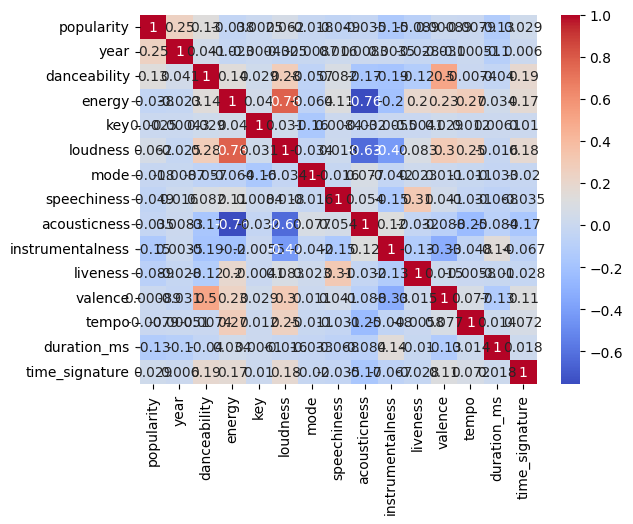

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlations
df_num = df.drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre"], axis=1)
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Key Observations from Correlation Analysis

##### Year and Popularity
- **Correlation:** 0.35 (moderate positive)
- **Insight:** Newer songs tend to be more popular. This may reflect shifts in music trends or changes in listener preferences over time.

##### Danceability and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Songs with higher danceability are slightly more likely to be popular, suggesting that danceable tracks appeal more to listeners.

##### Loudness and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Louder songs might be slightly more popular, which could be due to their prominence in certain genres that emphasize sound dynamics.

##### Instrumentalness and Popularity
- **Correlation:** -0.15 (moderate negative)
- **Insight:** Instrumental tracks tend to be less popular, possibly because listeners often prefer songs with vocals.

##### Duration and Popularity
- **Correlation:** -0.12 (weak negative)
- **Insight:** Longer songs are slightly less likely to be popular, which might reflect the preference for shorter, more engaging tracks in popular music.

---

#### Other Insights

##### Energy and Loudness
- **Correlation:** 0.78 (strong positive)
- **Insight:** Louder songs tend to have higher energy levels, which is expected since loudness is often associated with energetic tracks.

##### Danceability and Valence
- **Correlation:** 0.52 (moderate positive)
- **Insight:** More danceable songs are generally more positive or happy, which aligns with the upbeat nature of dance tracks.

##### Acousticness and Energy
- **Correlation:** -0.75 (strong negative)
- **Insight:** Acoustic tracks are typically less energetic, as they often feature softer, more mellow sounds compared to energetic genres.

##### Instrumentalness and Loudness
- **Correlation:** -0.40 (moderate negative)
- **Insight:** Instrumental tracks tend to be quieter, which could be due to the absence of vocals and the nature of instrumental music production.

---

#### Implications for Modeling

- **Relevant Features for Popularity Prediction:**
  - **Year**, **Danceability**, and **Instrumentalness** show moderate relevance to popularity and may be useful as predictors in regression models.
  
- **Less Useful Features:**
  - **Key**, **Time Signature**, and **Valence** have weak correlations with popularity and may have limited predictive power.

- **Multicollinearity Considerations:**
  - Features like **Energy** and **Loudness** are strongly correlated, so their inclusion in a model should be carefully considered to avoid multicollinearity issues.


## **3. Useful Visualizations for Analyzing the Music Dataset**


### **3.1. Histogram of Popularity**
- **Purpose:** To understand the distribution of the target variable, `popularity`.
- **Description:** A histogram provides a quick overview of how popular songs are in the dataset, showing the frequency of songs within different popularity ranges.
- **Key Insight:** Popularity may show a skewed distribution, with many songs falling into lower popularity brackets and fewer songs in the higher popularity range.

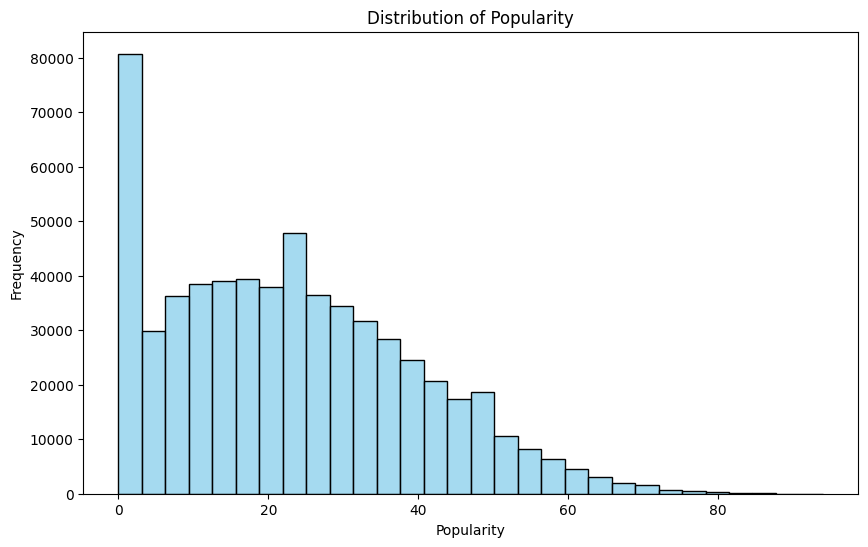

In [4]:
# Plot histogram of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#### Insights

The histogram provides the following insights:

1. **Skewed Distribution**  
   The data is heavily skewed towards the lower end of the popularity spectrum. Most songs have low popularity values, with a large spike at the very lowest range (possibly zero).

2. **Diverse Popularity**  
   A substantial number of songs are moderately popular (10–40 popularity), but very few reach high popularity levels (above 60).

3. **Potential Zero Popularity**  
   The large bar at zero could indicate a significant number of songs with no measurable popularity or that did not gain attention at all. This might be worth investigating further (e.g., are these songs not promoted, too niche, or poorly rated?).

4. **Decline in Popularity**  
   As the popularity increases, the frequency of songs decreases. High popularity is rare, which is typical in cultural domains where only a few items achieve widespread success.

5. **Analysis Directions**  
   - Investigate why so many songs have zero popularity.  
   - Explore the factors influencing songs with moderate popularity.  
   - Analyze the unique attributes of highly popular songs to identify trends or success factors.

This plot serves as a strong foundation for further analysis into the factors influencing song popularity.


### **3.2. Line Diagram of Popularity Over the Years**

- **Purpose:** To analyze the trend of song popularity over time by examining minimum, average, and maximum popularity values per year.  
- **Description:** A line diagram is used to display the minimum, average, and maximum popularity values for each year in the dataset. It helps identify long-term patterns or fluctuations in song popularity over time.  
- **Key Insights:**  
  - The **maximum popularity** remains relatively stable across the years, indicating consistent top-tier songs.  
  - The **average popularity** shows a gradual increase over the years, suggesting an overall improvement in song reception or dataset characteristics.  
  - The **minimum popularity** stays near zero, showing that some songs consistently have very low popularity.  



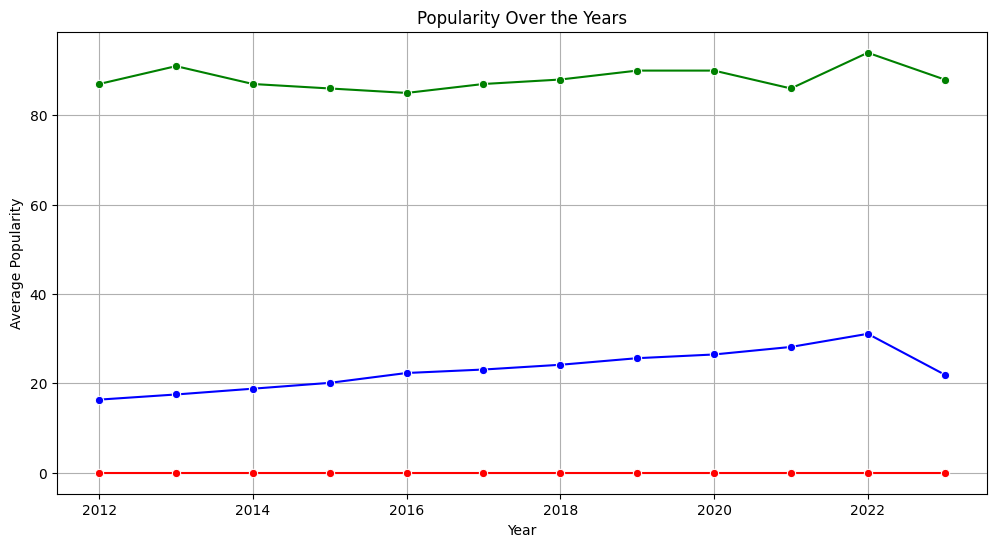

In [5]:
# Group by 'year' and calculate the mean popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean()
popularity_by_year_min = df.groupby('year')['popularity'].min()
popularity_by_year_max = df.groupby('year')['popularity'].max()

# Plotting the line diagram
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker='o', color='b')
sns.lineplot(x=popularity_by_year_min.index, y=popularity_by_year_min.values, marker='o', color='r')
sns.lineplot(x=popularity_by_year_max.index, y=popularity_by_year_max.values, marker='o', color='g')
plt.title('Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

#### Insights

This line chart shows the trends in **minimum**, **maximum**, and **average** popularity of songs over the years. Here are the key observations:

1. **Maximum Popularity (Green Line)**  
   - The maximum popularity remains consistently high, fluctuating around 80–90 throughout the years.  
   - This indicates that a few songs achieve very high popularity annually, with little variation over time.

2. **Average Popularity (Blue Line)**  
   - The average popularity shows a steady increase over the years, starting below 20 in 2012 and peaking around 25–30 in 2021–2022 before a slight decline.  
   - This trend suggests a gradual rise in the popularity of a broader range of songs, possibly reflecting changes in music distribution, promotion, or listening habits.

3. **Minimum Popularity (Red Line)**  
   - The minimum popularity consistently remains at or near zero across all years.  
   - This highlights that each year there are always songs with no measurable popularity, which could be due to niche appeal, lack of promotion, or other factors.

4. **Trends and Variations**  
   - The gap between average and maximum popularity indicates that while some songs dominate the charts, the majority remain far less popular.  
   - The increasing average popularity suggests a growing diversity in songs reaching moderate levels of success.

5. **Analysis Directions**  
   - Investigate the factors driving the consistent success of highly popular songs.  
   - Examine the reasons behind the increase in average popularity over the years.  
   - Analyze the characteristics of songs with near-zero popularity to understand their lack of success.

This plot highlights the evolving trends in song popularity and provides insights into both the top hits and the broader musical landscape.

### 3.3. **Box Plot of Danceability vs. Popularity**
- **Purpose:** To examine how danceability relates to the popularity of songs.
- **Description:** A box plot can show the distribution of danceability values across different popularity categories (e.g., high vs low popularity).
- **Key Insight:** You may observe that higher danceability tends to correspond with higher popularity, with outliers representing songs that don't follow the general trend.

/tmp/ipykernel_1697/3973940101.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity_category', y='danceability', data=df, palette='Set2')


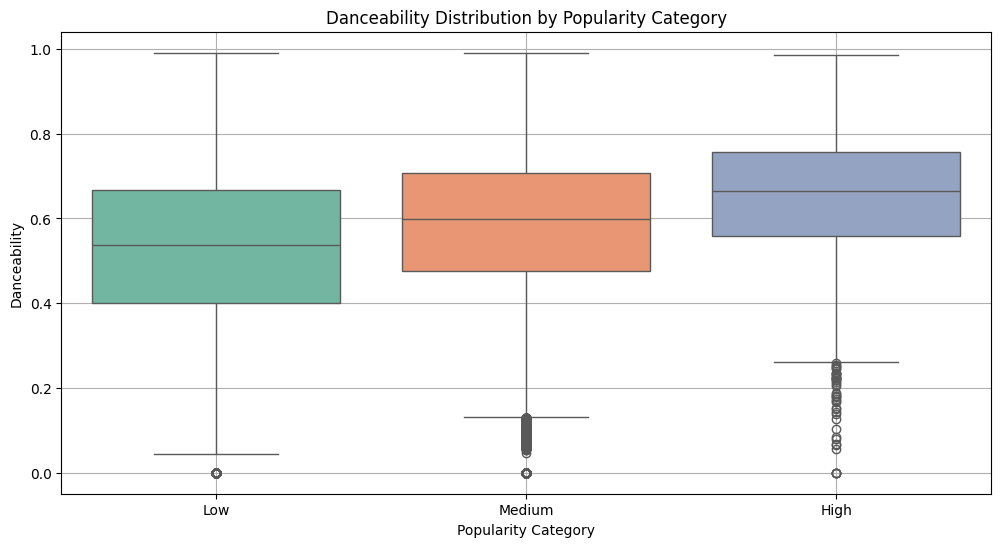

In [6]:
# Categorize popularity into bins (low, medium, high)
bins = [0, 33, 66, 100]  # Adjust these values as per the scale of your popularity data
labels = ['Low', 'Medium', 'High']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)

# Create the boxplot for danceability vs popularity category
plt.figure(figsize=(12, 6))
sns.boxplot(x='popularity_category', y='danceability', data=df, palette='Set2')
plt.title('Danceability Distribution by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

#### Insights from the Danceability Distribution by Popularity Category Plot

This box plot shows the distribution of **danceability** scores across three song popularity categories: **Low**, **Medium**, and **High**. Here are the key observations:

1. **Higher Danceability for Popular Songs**  
   - Songs in the **High** popularity category have higher median danceability scores compared to **Medium** and **Low** categories.  
   - This suggests that danceability might play a significant role in a song's popularity.

2. **Narrower Distribution for High Popularity**  
   - The range of danceability scores is slightly narrower for highly popular songs, indicating that high popularity is often associated with more consistent danceability levels.

3. **Low Popularity and Outliers**  
   - The **Low** popularity category shows the widest distribution, including many low danceability outliers.  
   - This could indicate that low danceability negatively impacts a song's popularity.

4. **Trends in Medium Popularity**  
   - Songs with **Medium** popularity fall in between, with a distribution that overlaps both low and high popularity categories.  
   - This implies that moderate danceability can also achieve some level of success.

5. **Analysis Directions**  
   - Investigate the specific danceability range most associated with high popularity.  
   - Analyze other factors in combination with danceability to better understand their influence on popularity.  
   - Examine the characteristics of outliers with low danceability in the Low category and their potential niche appeal.

This plot highlights the importance of danceability as a feature influencing song popularity, with higher danceability potentially increasing the likelihood of a song being well-received.

### 3.4. **Violin Plot for Acousticness vs. Popularity**
- **Purpose:** To visualize the distribution of acousticness for songs with varying levels of popularity.
- **Description:** A violin plot combines aspects of both box plots and density plots, showing the distribution of a feature (e.g., acousticness) for different categories of a target variable (e.g., popularity).
- **Key Insight:** The plot may reveal whether acoustic songs tend to be less popular than their electronic counterparts, aligning with the negative correlation observed earlier.

/tmp/ipykernel_1697/2477161046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='popularity_category', y='acousticness', data=df, palette='Set2')


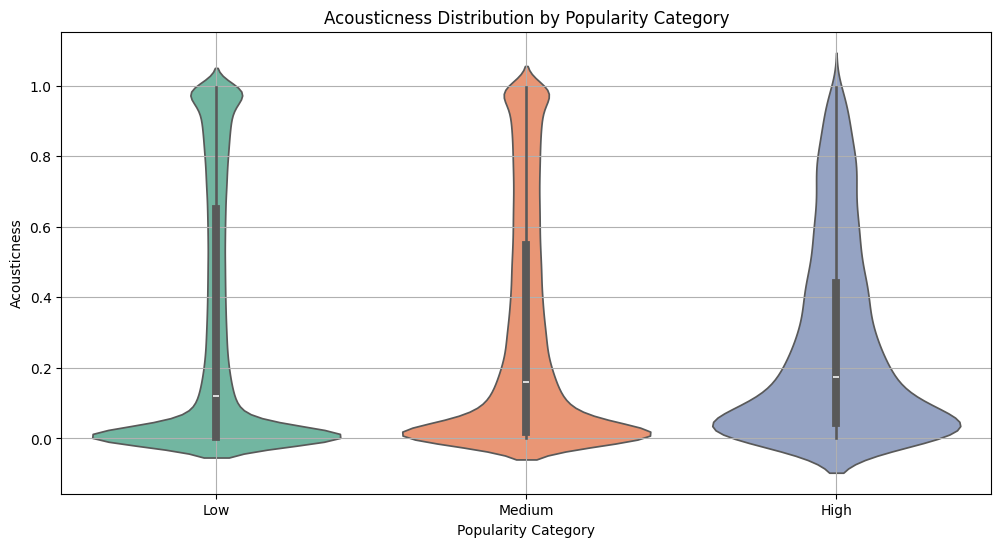

In [7]:
# Categorize popularity into bins (low, medium, high)
bins = [0, 33, 66, 100]  # Adjust these values as per the scale of your popularity data
labels = ['Low', 'Medium', 'High']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)

# Create the violin plot for acousticness vs popularity category
plt.figure(figsize=(12, 6))
sns.violinplot(x='popularity_category', y='acousticness', data=df, palette='Set2')
plt.title('Acousticness Distribution by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Acousticness')
plt.grid(True)
plt.show()

## **4. Clustering Songs Using K-Means**

This guide outlines the steps for clustering a dataset of songs based on their features using the K-Means algorithm. Clustering helps group similar songs together, which can provide valuable insights into patterns in the data.

### **Step 1: Feature Selection**
Identify the key features that describe the characteristics of each song. These features should be numerical and represent measurable aspects of the songs, such as their tempo, loudness, or instrumentalness.

### **Step 2: Standardize the Features**
To ensure all features contribute equally to the clustering process, standardize them. Standardization adjusts the data so that each feature has a mean of 0 and a standard deviation of 1, which is crucial for distance-based algorithms like K-Means.

### **Step 3: Determine the Optimal Number of Clusters**
Use the **Elbow Method** to decide how many clusters (`k`) are most suitable for the dataset. This involves running the K-Means algorithm with different values of `k` and plotting the "inertia" (a measure of clustering quality) for each. The optimal `k` is often at the point where the inertia stops decreasing significantly, forming an "elbow" in the plot.

### **Step 4: Apply K-Means**
Once the optimal number of clusters is identified, apply the K-Means algorithm to the standardized data. Each song will be assigned to one of the clusters based on its similarity to other songs.

### **Step 5: Visualize the Clusters**
Visualize the clusters to understand their distribution. Use tools like pair plots to see how the features separate across clusters. Each cluster is typically represented by a distinct color, making it easier to identify groupings.

### **Step 6: Analyze Clusters**
Examine the characteristics of each cluster by calculating the mean values of the selected features for each group. This helps in understanding what differentiates one cluster from another, such as whether a cluster contains more danceable or acoustic songs.

### **Outcome**
- **Group Similarity**: Songs are grouped into clusters based on shared characteristics.
- **Insights**: Clusters reveal underlying patterns in the data, like relationships between energy and popularity.
- **Applications**: Use clusters for tasks like playlist generation, trend analysis, or feature exploration.

**Next Steps**: Build upon this clustering by exploring additional insights, combining it with other methods (e.g., classification or prediction), or using it for practical applications such as personalized recommendations.


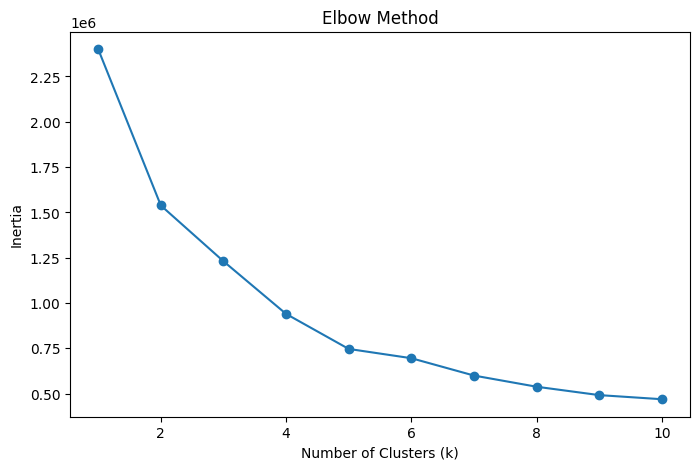

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['danceability', 'energy', 'acousticness', 'instrumentalness']  # Adjust based on your dataset
X = df[features]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use the elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means with the chosen number of clusters
optimal_k = 5  # Set based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clusters
# Example: Pair plot with clusters
#sns.pairplot(df, vars=features, hue='cluster', palette='viridis', diag_kind='kde')
#plt.suptitle('Clusters of Songs', y=1.02)
#plt.show()

# Step 5: Analyze clusters
# Get the mean of each feature for every cluster
#cluster_analysis = df.groupby('cluster')[features].mean()
#print(cluster_analysis)

# Save the clustered data to a CSV
#df.to_csv('export/clustered_songs.csv', index=False)

### **Results**

This clustering analysis groups songs into five distinct clusters based on their **danceability**, **energy**, **acousticness**, and **instrumentalness**. Below is an interpretation of the key characteristics and possible insights from each cluster.

#### **Cluster Summaries**
##### **Cluster 0**: **Energetic and Danceable Tracks**
- **Danceability:** 0.704 (High)
- **Energy:** 0.714 (High)
- **Acousticness:** 0.190 (Low)
- **Instrumentalness:** 0.031 (Low)
- **Interpretation:**
  - Songs in this cluster are highly energetic and danceable, with minimal acoustic or instrumental elements.
  - Likely represents **upbeat pop**, **dance music**, or **electronic genres**.
  - Suitable for activities like parties or workouts.

##### **Cluster 1**: **Acoustic and Balanced**
- **Danceability:** 0.518 (Moderate)
- **Energy:** 0.405 (Moderate-Low)
- **Acousticness:** 0.735 (High)
- **Instrumentalness:** 0.030 (Low)
- **Interpretation:**
  - This cluster represents moderately danceable and less energetic tracks with a strong acoustic component.
  - Likely includes **folk**, **indie acoustic**, or **ballads**.
  - Ideal for relaxing or casual listening.

##### **Cluster 2**: **Soft and Instrumental**
- **Danceability:** 0.369 (Low)
- **Energy:** 0.189 (Very Low)
- **Acousticness:** 0.878 (Very High)
- **Instrumentalness:** 0.854 (Very High)
- **Interpretation:**
  - Cluster 2 contains soft, highly acoustic, and predominantly instrumental songs.
  - Common genres could include **classical music**, **ambient tracks**, or **instrumental soundtracks**.
  - Suitable for studying, meditation, or background music.

##### **Cluster 3**: **Energetic and Non-Acoustic**
- **Danceability:** 0.426 (Low-Moderate)
- **Energy:** 0.848 (Very High)
- **Acousticness:** 0.059 (Very Low)
- **Instrumentalness:** 0.052 (Low)
- **Interpretation:**
  - Tracks in this cluster are highly energetic but not particularly danceable or acoustic.
  - Likely includes **hard rock**, **electronic music**, or **high-energy alternative**.
  - Perfect for high-intensity workouts or motivational moments.

##### **Cluster 4**: **Danceable and Instrumental**
- **Danceability:** 0.566 (Moderate-High)
- **Energy:** 0.777 (High)
- **Acousticness:** 0.077 (Low)
- **Instrumentalness:** 0.796 (High)
- **Interpretation:**
  - Songs in this cluster combine danceable rhythms with a significant instrumental component.
  - Could represent **instrumental electronic music**, **dance tracks**, or **movie soundtracks**.
  - Ideal for dynamic yet focused activities like working or driving.

#### **General Observations**
- **Energy vs. Acousticness:**
  - Clusters with high energy (Clusters 0, 3, 4) tend to have lower acousticness, suggesting a trade-off between these attributes.
  - Conversely, Clusters 1 and 2 have higher acousticness and lower energy, likely reflecting softer, acoustic tracks.

- **Instrumentalness:**
  - Clusters 2 and 4 stand out for their high instrumentalness, making them distinct from other clusters.
  - This suggests two types of instrumental music: softer, acoustic (Cluster 2) and energetic, danceable (Cluster 4).

- **Danceability:**
  - Clusters 0 and 4 are the most danceable, which makes them suitable for playlists focused on movement or rhythm-heavy experiences.


## **5. Making predictions**

### **5.1. One-hot Encoding the Cluster Membership**

The following line of code performs one-hot encoding on the `cluster` column in the DataFrame `df`:

In [8]:
# One-hot encode the cluster membership
df_encoded = pd.get_dummies(df, columns=['cluster'], drop_first=True)
df_encoded.to_csv('data/spotify_data_updated.csv', index=False)

### **5.2. Predicting Song Popularity Using Random Forest Regression**

This code performs regression analysis to predict the popularity of songs based on various features. Below is a step-by-step explanation of what the code does:

#### **Data Preparation**
- The code starts by cleaning the DataFrame `df_encoded` by dropping irrelevant or non-numeric columns such as:
  - `"Unnamed: 0"` (index column)
  - `"artist_name"` and `"track_name"` (string identifiers)
  - `"track_id"` (unique identifier)
  - `"genre"` (categorical feature)
  - `"popularity_category"` (categorical representation of the target variable)
- The resulting DataFrame `df_num` contains only numerical features suitable for regression.

#### **Feature and Target Definition**
- **Features (`X`)**: All columns except `"popularity"` are used as independent variables to predict the target.
- **Target (`y`)**: The `"popularity"` column is the dependent variable to be predicted.

#### **Data Splitting**
- The dataset is split into training and testing sets using `train_test_split`:
  - **Training Set**: 80% of the data is used to train the model.
  - **Testing Set**: 20% of the data is reserved to evaluate model performance.
- A random seed (`random_state=42`) ensures reproducibility of the split.

#### **Model Training**
- A `RandomForestRegressor` is initialized and trained:
  - `n_estimators=100`: The model uses 100 decision trees in the forest.
  - `max_depth=10`: The depth of each tree is limited to prevent overfitting.
  - `random_state=42`: Ensures reproducibility of the training process.
- The model is fit on the training data (`X_train` and `y_train`).

#### **Making Predictions**
- Predictions for the test set (`X_test`) are generated using the trained model.

#### **Model Evaluation**
- The Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance:
  - RMSE quantifies the average error between predicted (`y_pred`) and actual (`y_test`) values.
- The RMSE value is printed to assess the model's accuracy.

#### **Key Outcome**
- This process results in a trained regression model that predicts song popularity based on features such as danceability, energy, loudness, etc.
- The RMSE score provides insight into how well the model generalizes to unseen data.


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from joblib import dump

# Clean dataframe
df_num = df_encoded.drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre"], axis=1)

# Step 3: Defining the target
features = df_num.drop(columns=['popularity'])
target = df_num['popularity']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Train a regression model (Random Forest)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# After training your model
dump(model, 'trained_model.joblib')

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 14.346409167845424


### **Results**

The model was evaluated using the **Root Mean Squared Error (RMSE)**, which is a commonly used metric to measure the performance of regression models. The computed RMSE value is:

**Root Mean Squared Error: 14.35**

#### **What Does RMSE Represent?**
- RMSE measures the square root of the average squared differences between predicted and actual values. In simpler terms, it quantifies how far off the predictions are, on average, from the true values.
- A lower RMSE indicates better predictive performance, as the model's predictions are closer to the actual values.

#### **Interpreting the RMSE Value**
- **14.35 RMSE** means that, on average, the model's predictions for song popularity are off by **14.35** popularity points.
- Depending on the scale of the target variable (popularity), this can either be considered a good or poor performance:
  - If the popularity values range from 0 to 100, an RMSE of 14.35 suggests that the model has some level of accuracy but still makes significant errors on individual predictions.
  - If the popularity values have a smaller range, the RMSE would be considered relatively large, indicating room for improvement.

#### **Model Evaluation Context**
- This RMSE score reflects the overall performance of the model on unseen test data. While not perfect, it indicates that the model captures general trends and patterns in the data.
- The performance can be further analyzed by:
  - Comparing it with other models or tuning hyperparameters to reduce the error.
  - Inspecting individual feature importance to see which factors (e.g., danceability, energy) have a stronger influence on the model's predictions.

#### **Steps to Improve**
To improve the model's performance and reduce the RMSE, the following actions can be considered:
- **Hyperparameter Tuning**: Experimenting with different hyperparameters (e.g., increasing the number of trees or adjusting tree depth).
- **Feature Engineering**: Adding or transforming features that may have stronger relationships with popularity.
- **Model Selection**: Trying other regression models (e.g., Gradient Boosting, XGBoost) to see if they can achieve a lower RMSE.

In summary, the RMSE value of **14.35** gives an insight into the current predictive accuracy of the model, but further analysis and improvements are likely necessary to refine the predictions.


## **6. Counterfactual Analysis**

This Python function `optimize_feature_for_song` is designed to optimize a single feature for a given song in order to maximize its predicted popularity using a regression model. The function takes as input a trained regression model and a song's feature data and returns the best feature to modify, the optimal value for that feature, and the expected increase in popularity.

### **Function Parameters**
- **model**: The trained regression model that will be used to predict the song's popularity. It must have a `predict` method.
- **song_df**: A DataFrame where each row corresponds to a song, and each column represents a feature of the song (except for the 'popularity' column, which is the target).
- **song_index**: The index of the song (row in the DataFrame) to optimize. The default is 0 (i.e., the first song in the DataFrame).
- **delta**: The maximum allowed change for any feature. This parameter defines the range within which the feature values can be adjusted. The default is 0.2.

### **Function Workflow**
1. **Feature Extraction**: The function first identifies the feature columns in the DataFrame by dropping the 'popularity' column. It then extracts the feature vector for the song at the specified `song_index` and the original popularity value of that song using the model's `predict` method.

2. **Optimization Loop**:
   - The function loops over each feature in the song's feature vector.
   - For each feature, it generates a set of candidate values that are within a certain range, defined by the `delta` parameter. This range ensures that the feature values are not changed too drastically (between the original value - delta and the original value + delta).
   - For each candidate value, the function creates a new feature vector where the selected feature is replaced with the candidate value and predicts the new popularity using the model.
   
3. **Calculate Increase in Popularity**: The function computes the increase in popularity (predicted popularity - original popularity) for each candidate value. If the increase is greater than any previously calculated increase, it updates the best feature and the optimal candidate value.

4. **Return the Best Feature**: After looping through all features and candidate values, the function returns:
   - **best_feature**: The name of the feature that should be changed to maximize the predicted popularity.
   - **optimal_value**: The candidate value for that feature that results in the highest predicted increase in popularity.
   - **max_increase**: The expected increase in popularity when changing the selected feature to the optimal value.

### **Purpose**
The main goal of this function is to identify the feature (e.g., energy, danceability) and the optimal value for that feature that maximizes the song's popularity based on the model's predictions. This can be useful for understanding how different features influence the predicted popularity and for suggesting adjustments to increase popularity.


In [ ]:
import numpy as np

def optimize_feature_for_song(model, song_df, song_index=0, delta=0.2):
    """
    Optimizes a single feature for a given song (row in the DataFrame) to maximize predicted popularity.
    
    Parameters:
    - model: Trained regression model with a `predict` method.
    - song_df: DataFrame, where each row represents a song's features. Expects a column 'popularity'.
    - song_index: Index of the song in the DataFrame to optimize.
    - delta: Maximum allowed change for any feature (default: 0.2).
    
    Returns:
    - best_feature: The name of the feature to change (from song_df columns).
    - optimal_value: The new value for the selected feature.
    - predicted_increase: The expected increase in popularity.
    """
    best_feature = None
    optimal_value = None
    max_increase = -np.inf
    
    # Get the feature names by excluding 'popularity' column
    feature_names = song_df.drop('popularity', axis=1).columns.tolist()
    
    # Get the feature vector for the specified song (excluding 'popularity')
    original_features = song_df.drop("popularity", axis=1).iloc[song_index].values
    original_popularity = model.predict([original_features])[0]  # Predict initial popularity
    
    # Loop over each feature in the song's feature vector
    for j in range(len(original_features)):  
        original_value = original_features[j]
        
        # Generate candidate values within the allowed range
        candidates = np.linspace(max(0, original_value - delta), 
                                 min(1, original_value + delta), 
                                 10)
        
        for candidate in candidates:
            # Perturb the feature and predict the new popularity
            perturbed_features = original_features.copy()
            perturbed_features[j] = candidate
            predicted_popularity = model.predict([perturbed_features])[0]
            
            # Calculate the increase in popularity
            increase = predicted_popularity - original_popularity
            
            if increase > max_increase:
                max_increase = increase
                best_feature = feature_names[j]  # Store the name of the best feature
                optimal_value = candidate
    
    return best_feature, optimal_value, max_increase

### **Optimizing Features for Songs**

- **Purpose:** This code iterates through a DataFrame of songs, optimizes a specific feature for each song to maximize its predicted popularity, and updates the DataFrame with the results.  

#### **Step-by-Step Breakdown:**

1. **Create New Columns:**  
   - The code ensures the DataFrame contains the necessary columns (`best_feature`, `optimal_value`, `predicted_increase`) to store the optimization results.  
   - If these columns are missing, they are added with default values (`None`).  

2. **Iterate Through Rows:**  
   - The loop iterates through each row in the DataFrame, processing only those rows where the `best_feature` column is empty (`None` or NaN).  

3. **Prepare Feature Vector:**  
   - For each song, the code extracts its feature vector by excluding irrelevant columns such as metadata (`artist_name`, `track_name`, etc.) and the target columns (`best_feature`, `optimal_value`, `predicted_increase`).  

4. **Optimize Features:**  
   - The function `optimize_feature_for_song` is called for the given song's feature vector.  
   - Inputs to the function:  
     - **`model`:** A pre-trained model used to predict song popularity.  
     - **`song_df`:** The feature vector for the current song.  
   - Outputs from the function:  
     - **`best_feature`:** The feature with the most potential to improve the song's popularity.  
     - **`optimal_value`:** The ideal value of the feature for maximizing popularity.  
     - **`predicted_increase`:** The predicted increase in popularity if the feature is optimized.  

5. **Update the DataFrame:**  
   - The results from the optimization are written back to the corresponding row in the DataFrame.  

6. **Save Results:**  
   - After processing all rows, the updated DataFrame is saved to a CSV file named `spotify_data_results.csv`.  
   - This ensures the results are persistent and can be used for further analysis.  

#### **Key Insights:**
- This code performs a row-wise optimization task efficiently by processing only incomplete rows.  
- The use of a pre-trained model allows predictions for how modifying features impacts popularity.  
- Results are saved to a CSV file, enabling future exploration or validation of the findings.  


In [ ]:
# Create new columns in case they don't exist
if 'best_feature' not in df.columns:
    df['best_feature'] = None
if 'optimal_value' not in df.columns:
    df['optimal_value'] = None
if 'predicted_increase' not in df.columns:
    df['predicted_increase'] = None

# Iterate over the DataFrame, but only for rows where 'best_feature' is empty or None
for index in df.index:

    # Check if 'best_feature' is empty or NaN
    if pd.isna(df.at[index, 'best_feature']) or df.at[index, 'best_feature'] == '':
        # Get the song's feature vector (excluding the target column)
        song = df.loc[[index]].drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre", "best_feature", "optimal_value", "predicted_increase"], axis=1)

        # Optimize the feature for the song
        best_feature, optimal_value, predicted_increase = optimize_feature_for_song(
            model=model,
            song_df=song
        )
        
        # Update the DataFrame with the results
        df.at[index, 'best_feature'] = best_feature
        df.at[index, 'optimal_value'] = optimal_value
        df.at[index, 'predicted_increase'] = predicted_increase

# Save the updated DataFrame back to the CSV file
df.to_csv('data/spotify_data_results.csv', index=False)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.loc

Results